<h4><span style="color: green"><strong>AQL</strong></span> = Acceptance Quality Limit</h4>


In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

import PIL
import PIL.Image as Image

<strong>Opdracht</strong><br>
"Schrijf ook een compact programma dat op basis van de validatie- en test-set van de appels een batch samenstelt, waarop je een inspectie kunt uitvoeren.<br> 
Genereer bijvoorbeeld een batch met een sample size van 80 appels, waarvan 72 gezond, 4 met blotch, 1 met rot en 3 met scab, en voer dit aan je afwijkingherkenner.<br>
Hieruit moet dan het juiste kwaliteitslabel rollen.<br> 

<i>Statistieken</i><br> 
Naast een kwaliteitslabel toont de applicatie ook het aantal gezonde en zieke appels, de laatste uitgesplitst in de categorieën gevlekt (blotch), rot (rot) en schurft (scab).<br>
Dit onderdeel is verder uit te breiden in overleg." 

<strong>Gegeven</strong><br>
General Inspection Level: 1<br>
Een oogst batch bevat tussen de 5.000 en 10.000 appels<br>

AQL.pdf:<br>
Lot size 3201 / 10.000 > General Inspection Level 1: J<br>
Acceptance Quality Limit - Normal Inspection > J<br>
Sample size = 80<br>

<small>(Online AQL Calculator: Bij Klasse 1 wordt er altijd een minimum sample batch van 125 gevraagd.<br> 
Voor dit project zullen we uit praktische overwegingen voor alle klassen van 80 uitgaan.)</small><br>

Dus:
<ul>
    <li>  
        Klasse 1: AQL kleiner/gelijk aan 0.4&nbsp;&nbsp;|&nbsp;&nbsp;Accepted: <= 1&nbsp;&nbsp;|&nbsp;&nbsp;Rejected >= 2
    </li>
    <li>
        Klasse 2: AQL tussen 0.4 en 2.5&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;Accepted: <= 5&nbsp;&nbsp;|&nbsp;&nbsp;Rejected >= 6
    </li>
    <li>
        Klasse 3: AQL tussen 2.5 en 6.5&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;Accepted: <= 7&nbsp;&nbsp;|&nbsp;&nbsp;Rejected >= 8
    </li>
    <li>
        Afgekeurd: AQL groter dan 6.5&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;Accepted: <= 10&nbsp;&nbsp;|&nbsp;&nbsp;Rejected >= 11
    </li>    
</ul>  

<strong>Plan van aanpak:</strong><br>
Met if/else statements kunnen we op basis van aantallen van Accepted/Rejected een klasse toewijzen.<br>

Deze statements doorlopen we met een for-loop.<br>
Eerst dacht ik dit te doen door een lijst per label te vullen, maar met de .count() methode is dit nog veel makkelijker voor elkaar te krijgen.<br> 
De uitslag (Klasse en aantallen per label) kunnen we printen.<br>

De input is voor nu een lijst van 80 (sample batch) appels.<br>
Door deze aan te passen, meer of minder zieke appels, kunnen controleren of de klasse en aantallen juist weergegeven worden.

<strong>Eerste opzet</strong><br>
Plan was hierbij om een functie te schrijven die het gegeven voorbeeld (80 appels, waarvan 72 gezond, 4 met blotch, 1 met rot en 3 met scab) te kunnen weergeven,<br>
om vanuit daar een meer abstracte functie te schrijven die variabele input aankan.

In [4]:
# if qualityLabel <= 1:                                          # 80-1 dus normalApple >= 79:
#     print (f'The batch has been qualified as: Class 1')
# elif qualityLabel <=5:
#     print (f'The batch has been qualified as: Class 2')        # 80-5 dus >= 75 normalApple
#      print (f'The batch has been qualified as: Class 2')
# elif qualityLabel <=7:
#     print (f'The batch has been qualified as: Class 3')         # 80-7 dus >= 73 normalApple
# else:
#     print (f'The batch has been rejected')

def AQLTestScore(): 
    
    sampleSize = 125 # batch_size > len(batch)
    
    # normalApple = 75    # "n"
    # blotchApple = 2     # "b"
    # rotApple = 0        # "r"
    # scabApple = 3       # "s"
    
    # normalApple = "h"
    # blotchApple = "b"
    # rotApple = "r"
    # scabApple = "s"
    
    sampleBatch = [
                   "h","h","h","h","h","b","b","h","h","h","h","h","h","h","h","h","r","h","h","h", 
                   "h","h","h","h","b","h","h","h","h","h","h","h","r","h","h","h","h","b","h","h",
                   "h","h","h","h","h","h","h","h","h","h","h","h","h","h","h","h","h","h","h","h",
                   "h","h","h","h","h","h","h","h","h","h","h","h","h","h","h","h","h","h","h","h",
                  ]
    
    # appleScore = sampleBatch.count("h")
    # print (appleScore)
    # appleScore = []

   
    for apple in sampleBatch:

        appleScore = sampleBatch.count("h")
    #     appleScore = 0
    #     if apple != "n":
    #         appleScore += 1
    
        blotchApple = sampleBatch.count("b")
        rotApple = sampleBatch.count("r")
        scabApple = sampleBatch.count("s")  
    
    #    appleScore = sampleBatch.count("defect")
    #      totalAppleScore.append(appleScore)
    #
    #    for i in totalAppleScore:
    #       del totalLamps[totalLamps.index(i)]
    
        # answer = {i: sampleBatch.count(i) for i in sampleBatch}
        # appleScore = int(answer["h"])
        # return (answer["h"] + answer["b"] + answer["r"] + answer["s"])
        
        # print( answer["h"] + answer["b"] + answer["r"] + answer["s"] )
       
        if appleScore >=79:                                          
            print (f'The batch has been qualified as: Class 1\n')
        elif appleScore >=75:
            print (f'The batch has been qualified as: Class 2\n')
        elif appleScore >=73:
            print (f'The batch has been qualified as: Class 3\n')
        else:
            print (f'The batch has been rejected\n')
                
        print (f'The total batch of {len(sampleBatch)} apples consists of:\n'
        f'Healthy apples:   {appleScore}\n'
        f'Blotched apples:   {blotchApple}\n'
        f'Rotten apples:     {rotApple}\n'
        f'Scabbed apples:    {scabApple}\n')    
        break    

AQLTestScore()

# Extra: count if normalApple + blotchApple + rotApple + scabApple == sampleSize 

The batch has been qualified as: Class 3

The total batch of 80 apples consists of:
Healthy apples:   74
Blotched apples:   4
Rotten apples:     2
Scabbed apples:    0



Aangezien ik eerst dacht dat we vanuit het startpunt ('Normal inspection' of zelfs 'General Inspection Level: 1') zouden beginnen,<br>
had ik het idee om dit met dictionaries danwel een Pandas DataFile op te gaan zetten, waar in met code gezocht kon worden (met key/value of iloc).<br>

De insteek van de opdracht bleek wat simpeler te zijn, vandaar onderstaande dictionary ... en einde oefening voor dit specifieke stukje.

In [5]:
# dictionary {"Letter code": Sample size}? for batch size

letterCode = ["A","B","C","D","E","F","G","H","J","K","L","M","N","P","Q","R"]
sampleSize = [2,3,5,8,13,20,32,50,80,125,200,315,500,800,1250,2000]

normalInspectionCodes = dict(zip(letterCode, sampleSize))
 
# print("Resultant dictionary is : " + str(normalInspectionCodes))

# select correct key (J)
# print("Please give letter code to create the corresponding batch size:")     
# codeForBatchSize = input("Please give letter code to create the corresponding batch size:")

In [6]:
# temp

codeForBatchSize = "J"

print("The letter code is: " + codeForBatchSize)       

print(f"\nThe batch size is", normalInspectionCodes[codeForBatchSize], "apples")


The letter code is: J

The batch size is 80 apples


<strong>Tweede opzet</strong><br>
Opgeschoonde versie van eerste opzet.

In [1]:
sampleBatch = [
                   "h","h","h","h","h","s","b","h","h","h","h","h","h","h","h","h","r","h","h","h", 
                   "h","h","h","h","h","h","h","h","h","h","h","h","r","h","h","h","h","b","h","h",
                   "h","s","h","h","h","h","h","h","h","h","h","h","h","h","h","h","h","h","h","h",
                   "h","h","h","h","h","h","h","h","h","h","h","b","h","h","h","h","h","h","h","h",
                  ]
    
appleScore = sampleBatch.count("h")
blotchApple = sampleBatch.count("b")
rotApple = sampleBatch.count("r")
scabApple = sampleBatch.count("s") 

def AQLTestScore(): 
        
    for apple in sampleBatch:
       
        if appleScore >=79:                                          
            print (f'The batch has been qualified as: Class 1\n')
        elif appleScore >=75:
            print (f'The batch has been qualified as: Class 2\n')
        elif appleScore >=73:
            print (f'The batch has been qualified as: Class 3\n')
        else:
            print (f'The batch has been rejected\n')
                
        print (f'The total batch of {len(sampleBatch)} apples consists of:\n'
        f'Healthy apples:   {appleScore}\n'
        f'Blotched apples:   {blotchApple}\n'
        f'Rotten apples:     {rotApple}\n'
        f'Scabbed apples:    {scabApple}\n')    
        break    

AQLTestScore()


The batch has been qualified as: Class 3

The total batch of 80 apples consists of:
Healthy apples:   73
Blotched apples:   3
Rotten apples:     2
Scabbed apples:    2



Voor plot: https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/<br>
Met kleine aanpassingen om te kijken hoe het werkt en wat er mogelijk is. 

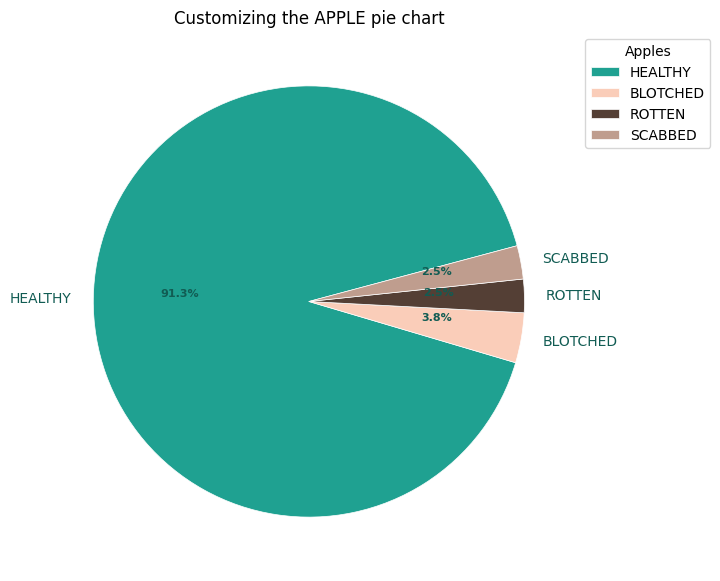

In [2]:

from matplotlib import pyplot as plt
import numpy as np
 

# Creating dataset
appleLabels = ['HEALTHY', 'BLOTCHED', 'ROTTEN', 'SCABBED']
 
data = [appleScore, blotchApple, rotApple, scabApple]

# Creating explode data
explode = (0.0, 0.0, 0.0, 0.0) # not necessary

# Creating color parameters
colors = ( "#1FA191", "#FACDB9", "#543F35", "#BF9D8E")

# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "white" }

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
								autopct = lambda pct: func(pct, data),
								explode = explode,
								labels = appleLabels,
								shadow = False,
								colors = colors,
								startangle = 15,
								wedgeprops = wp,
								textprops = dict(color ="#115C53"))

# Adding legend
ax.legend(wedges, appleLabels,
		title ="Apples",
		loc ="upper left",
		bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing the APPLE pie chart") # add Classification as title

# show plot
plt.show()